<p style="font-size:32px;text-align:center"> <b>Facebook Friend Recommendation using Graph Mining</b> </p>

<p style="font-size:23px;text-align:center"> <b>Part 1: Exploratory Data Analysis</b> </p>

### Problem statement:
Given a directed social graph, have to predict missing links to recommend users (Link Prediction in graph)    

#### Eg:
    Lets say User 1 is friends with User 2 and User 3
             User 4 is friends with User 2 an User 3
             User 5 is friends with User 3
    So Task: Find if User 5 can be Friends with User 1 or not (given User 1 and User 5 both have User 3 as mutual friend)

### Data Overview
Taken data from facebook's recruting challenge on kaggle https://www.kaggle.com/c/FacebookRecruiting  
data contains two columns source and destination eac edge in graph 
    - Data columns (total 2 columns):  
    - source_node         int64  
    - destination_node    int64  

### Business objectives and constraints:  
- No low-latency requirement.
- Probability of prediction is useful to recommend ighest probability links

### Performance metric for supervised learning:  
- Both precision and recall is important so F1 score is good choice
- Confusion matrix

## 1. Exploratory Data Analysis (Basic Stats)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
import pickle
import csv

In [2]:
if not os.path.isfile('data/after_eda/train_woheader.csv'):   # If this file is not present then do this below steps
    traincsv = pd.read_csv("data/tran.csv")
    print(traincsv[traincsv.isna().any(1)])
    print(traincsv.info())
    print("No of duplicates",sum(traincsv.duplicated()))
    traincsv.to_csv('data/after_eda/train_woheader.csv',header=False,index=False)
else:
    g = nx.read_edgelist('data/after_eda/train_woheader.csv',delimiter = ",",create_using = nx.DiGraph(),nodetype = int )
    print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


#### Using a subset from a graph for visualization

Name: 
Type: DiGraph
Number of nodes: 42
Number of edges: 30
Average in degree:   0.7143
Average out degree:   0.7143


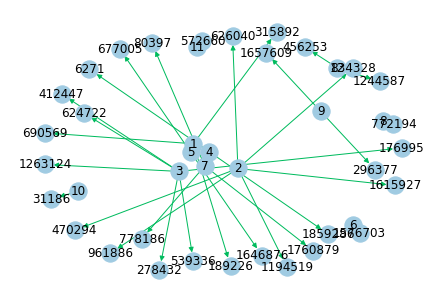

In [3]:
if not os.path.isfile("train_woheader_sample.csv"):
    # Taking only first 30 rows with no headers
    pd.read_csv("data/train.csv",nrows = 30).to_csv('train_woheader_sample.csv',header = False,index = False)
    
subgraph = nx.read_edgelist('train_woheader_sample.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)

pos=nx.spring_layout(subgraph)

nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))

### Q1: Total Number of Unique Persons ?

In [4]:
print(" tal number of Unique Persons are:",len(g.nodes()))   ## 1.86 Million

 tal number of Unique Persons are: 1862220


### Q2. Total Number of Followers for each person? (In_Degree)

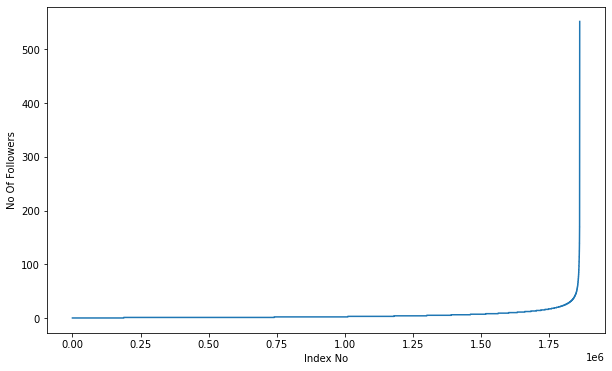

We can see that From 0 to 1.6 million (Index) there are very less number of users less than 100 and then suddenly there is massive growth where one of the index has more than 500 followers


In [5]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

print("We can see that From 0 to 1.6 million (Index) there are very less number of users less than 100 and then suddenly there is massive growth where one of the index has more than 500 followers")

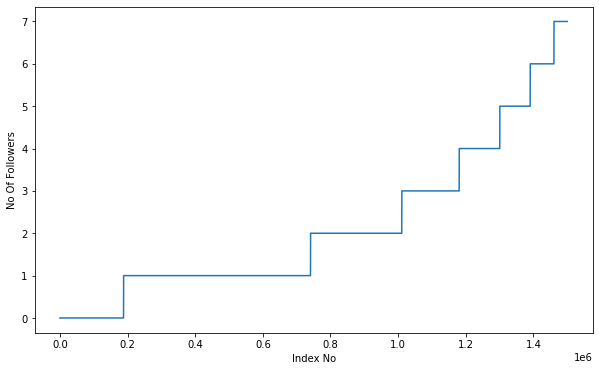

Here we are ploting from 0 to 1.5 million to see how it is icreasing from 0 to 1.5 from followers 0 to 7


In [6]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist[0:1500000])   # 0 to 1.5 million
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

print("Here we are ploting from 0 to 1.5 million to see how it is icreasing from 0 to 1.5 from followers 0 to 7")

In [7]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


#### Conclusion: Over 99% of people are having less than 40 Followers

In [8]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


#### Conclusion: Over 99.9% of people are having less than 112 Followers

### Q3. No of people each person is following (Out_Degree)

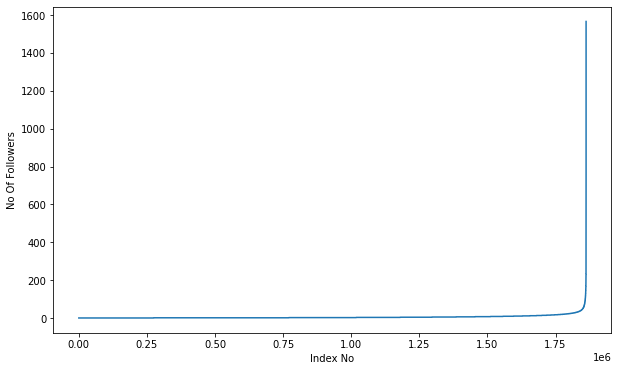

In [9]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

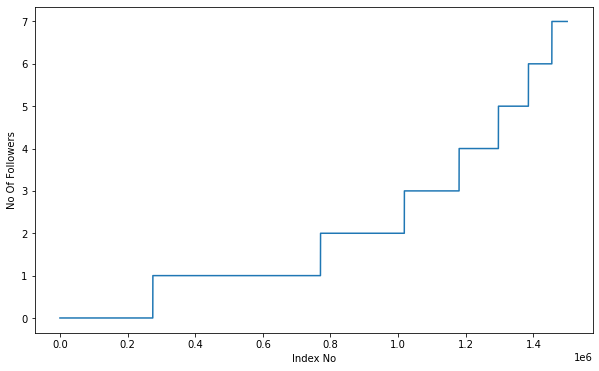

In [10]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist[0:1500000])   # 0 to 1.5 million
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

In [11]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


#### Conclusion: Over 99% of people are following less than 40 peoples

In [12]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


#### Conclusion: Over 99.9% of people are following less than 123 peoples

### Q4. Indegree + Outdegree (i.e Both Followers + Following)

In [13]:
from collections import Counter

In [14]:
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())

In [15]:
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

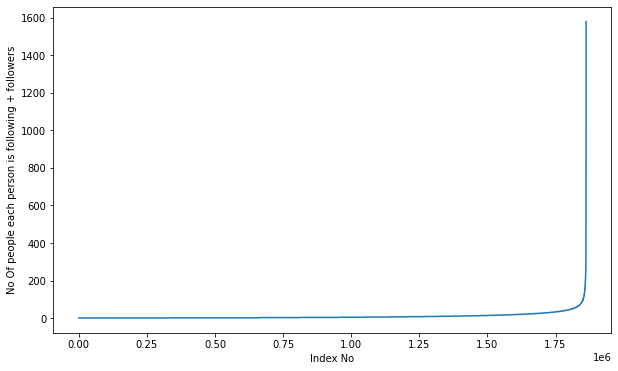

In [16]:
in_out_degree_sort = sorted(in_out_degree)

plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

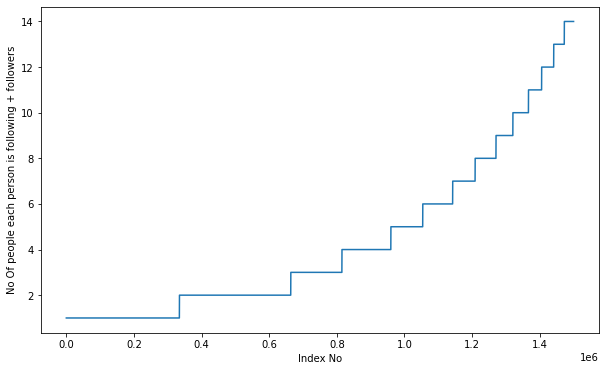

In [17]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [18]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [19]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


### Q5: Min number of followers + Following (in_degree + out_degree)

In [20]:
print("Min number of followers + Following:",in_out_degree.min())
print(np.sum(in_out_degree == in_out_degree.min()),"persons are having min number of followers + Following")

Min number of followers + Following: 1
334291 persons are having min number of followers + Following


### Q6: Max number of followers + Following (in_degree + out_degree)

In [21]:
print("Max number of followers + Following:",in_out_degree.max())
print(np.sum(in_out_degree == in_out_degree.max()),"persons are having max number of followers + Following")

Max number of followers + Following: 1579
1 persons are having max number of followers + Following


#### Observations: So the key take away from all this analysis is that there are only few people who have max following + followers rest all have very few followers & following so in this case we have high Outliers

## 2. Mapping this real world problem into Machine learning problem

### Overview 
    Nodes/Vertices = 1.86 million , directed edges = 9.43 million 
    where edges >> Nodes (bcoz one person (Node) can follow many peoples(edges))
### But if we notice our dataset only consist 
    Of only people who have edges between them i.e yi = 1 we dont have yi = 0
    So we have to generate those edges/link from train.csv
### How to generate those missing links ?
    Lets eg: if we have total (n) Vertex then for each vertex we can have (n-1) edges
    So lets n = 1.86 million then calculate all possible edges 
    [1.86*10^6 *(1.86*10^6-1)] = 3.45e^12  which is massive number.
    And we have only 9.43 million edges which is small subset from it.
    So what we can do is that out of the entire graph we will take small random sample points where yi=0
    i.e 9.43 million random sample where yi = 0, so that our dataset will be Balanced dataset.
### So we will generate all missing link/edges of len(9.43 m) who has the shortest path > 2

<img src="edge1.png" width="250" height="130">

#### Case 1 (0,2):
    0 and 2 are not connected but it has shorted path = 2 so there might be chance that they may know each other
    so will not take such cases where shortest path is 2
#### Case 2 (0,3):
    0 and 3 having shorted path = 3 so we can add those into our missing links as yi = 0

In [22]:
import random
if not os.path.isfile('data/after_eda/missing_edges_final.p'):
    #getting all set of edges
    r = csv.reader(open('data/after_eda/train_woheader.csv','r'))
    edges = dict()
    for edge in r:
        edges[(edge[0], edge[1])] = 1
        
        
    missing_edges = set([])
    while (len(missing_edges)<9437519): 
        a=random.randint(1, 1862220)  # generate random integers from 1 to 1.86 million
        b=random.randint(1, 1862220) # generate random integers from 1 to 1.86 million
        tmp = edges.get((a,b),-1)
        if tmp == -1 and a!=b:
            try:
                #https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html
                if nx.shortest_path_length(g,source=a,target=b) > 2: 

                    missing_edges.add((a,b))               
                else:
                    continue  
            except:  
                    missing_edges.add((a,b))              
        else:
            continue
    pickle.dump(missing_edges,open('data/after_eda/missing_edges_final.p','wb'))
else:
    missing_edges = pickle.load(open('data/after_eda/missing_edges_final.p','rb'))

In [23]:
len(missing_edges)

9437519

## 3. Train Test Split

### So after doing all the above steps we have:
    source node , destination node , output label (1,0) balanced
### But we have one problem:
    As in real world such type of dataset contains time along with it
    So when we use time based data we can check after 30 days and our data will be changed
    This is known as Temporal changing data
### But unfortunately we dont have time based data :
    So we are now left with Random Split

In [24]:
from sklearn.model_selection import train_test_split
if (not os.path.isfile('data/after_eda/train_pos_after_eda.csv')) and (not os.path.isfile('data/after_eda/test_pos_after_eda.csv')):
    df_pos = pd.read_csv("data/train.csv")  # train data with yi=1
    df_neg = pd.DataFrame(list(missing_edges),columns = ["source_node","destination_node"])
    
    print("Number of nodes with edges",df_pos.shape[0])
    print("Number of nodes without edges",df_neg.shape[0])
    

                                     ##### Train Test Split (80:20)######
        
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df_pos,np.ones(len(df_pos)),test_size = 0.2, random_state=9)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(df_neg,np.zeros(len(df_neg)),test_size = 0.2, random_state=9)
    
    
    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])   
    
    #removing header and saving
    X_train_pos.to_csv('data/after_eda/train_pos_after_eda.csv',header=False, index=False)
    X_test_pos.to_csv('data/after_eda/test_pos_after_eda.csv',header=False, index=False)
    X_train_neg.to_csv('data/after_eda/train_neg_after_eda.csv',header=False, index=False)
    X_test_neg.to_csv('data/after_eda/test_neg_after_eda.csv',header=False, index=False)
else:
    #Graph from Traing data only 
    del missing_edges

Number of nodes with edges 9437519
Number of nodes without edges 9437519
Number of nodes in the train data graph with edges 7550015 = 7550015
Number of nodes in the train data graph without edges 7550015 = 7550015
Number of nodes in the test data graph with edges 1887504 = 1887504
Number of nodes in the test data graph without edges 1887504 = 1887504


In [28]:
X_train_pos = pd.read_csv('data/after_eda/train_pos_after_eda.csv', names=['source_node', 'destination_node'])
X_test_pos = pd.read_csv('data/after_eda/test_pos_after_eda.csv', names=['source_node', 'destination_node'])
X_train_neg = pd.read_csv('data/after_eda/train_neg_after_eda.csv', names=['source_node', 'destination_node'])
X_test_neg = pd.read_csv('data/after_eda/test_neg_after_eda.csv', names=['source_node', 'destination_node'])
print('='*60)
print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
print('='*60)
print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])
X_train = X_train_pos.append(X_train_neg,ignore_index=True)
y_train = np.concatenate((y_train_pos,y_train_neg))
X_test = X_test_pos.append(X_test_neg,ignore_index=True)
y_test = np.concatenate((y_test_pos,y_test_neg)) 

X_train.to_csv('data/after_eda/train_after_eda.csv',header=False,index=False)
X_test.to_csv('data/after_eda/test_after_eda.csv',header=False,index=False)
pd.DataFrame(y_train.astype(int)).to_csv('data/train_y.csv',header=False,index=False)
pd.DataFrame(y_test.astype(int)).to_csv('data/test_y.csv',header=False,index=False)

Number of nodes in the train data graph with edges 7550015
Number of nodes in the train data graph without edges 7550015
Number of nodes in the test data graph with edges 1887504
Number of nodes in the test data graph without edges 1887504


In [29]:
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of traget variable in train",y_train.shape)
print("Shape of traget variable in test", y_test.shape)

Data points in train data (15100030, 2)
Data points in test data (3775008, 2)
Shape of traget variable in train (15100030,)
Shape of traget variable in test (3775008,)
